<a href="https://colab.research.google.com/github/Inigss/CSST104-3B-YR2627/blob/main/Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Task1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import geopandas as gpd
import folium


#Task 2

1. How many columns does the dataset contain?
The dataset contains 169 columns (this may slightly vary depending on version).

2. What type of geometries are included?
The dataset contains Polygon and MultiPolygon geometries.

3. What does the geometry column represent?
The geometry column represents the spatial boundary of each country (its shape and location on Earth).


        featurecla  scalerank  LABELRANK                   SOVEREIGNT SOV_A3  \
0  Admin-0 country          1          6                         Fiji    FJI   
1  Admin-0 country          1          3  United Republic of Tanzania    TZA   
2  Admin-0 country          1          7               Western Sahara    SAH   
3  Admin-0 country          1          2                       Canada    CAN   
4  Admin-0 country          1          2     United States of America    US1   

   ADM0_DIF  LEVEL               TYPE TLC                        ADMIN  ...  \
0         0      2  Sovereign country   1                         Fiji  ...   
1         0      2  Sovereign country   1  United Republic of Tanzania  ...   
2         0      2      Indeterminate   1               Western Sahara  ...   
3         0      2  Sovereign country   1                       Canada  ...   
4         1      2            Country   1     United States of America  ...   

      FCLASS_TR     FCLASS_ID     FCLASS_PL 

<Axes: >

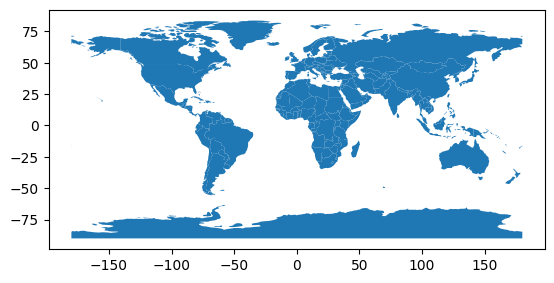

In [4]:
# Load Natural Earth Dataset (GeoPandas Compatible)
url = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)

print(world.head())
world.plot()

#Task 3

1. What does EPSG:4326 represent?
EPSG:4326 represents the WGS84 geographic coordinate system, which uses latitude and longitude in degrees.

2. Why is CRS important in spatial analysis?
CRS is important because it ensures spatial data is correctly aligned and allows accurate measurement, mapping, and spatial computation.

In [21]:
print("Current CRS:", world.crs)

Current CRS: EPSG:4326


#Task 4

1. Why can’t we compute area accurately using EPSG:4326?
Because EPSG:4326 uses degrees (latitude and longitude), not meters. Area calculations require a projected CRS with metric units for accurate measurement.

2. What is EPSG:3857 based on?
EPSG:3857 is based on the WGS84 datum and uses the Web Mercator projection, which measures coordinates in meters.

In [7]:
# Reproject to Metric CRS
world_projected = world.to_crs(epsg=3857)

# Compute area in square meters
world_projected["area_m2"] = world_projected.geometry.area

print(world_projected[["ADMIN", "area_m2"]].head())

print("\nArea Reprojection ✅ Complete")

                         ADMIN       area_m2
0                         Fiji  2.128334e+10
1  United Republic of Tanzania  9.522552e+11
2               Western Sahara  1.171023e+11
3                       Canada  5.216648e+13
4     United States of America  2.186228e+13

Area Reprojection ✅ Complete


#Task 5

1. What is a centroid?
A centroid is the geometric center point of a polygon.

2. How can centroid coordinates be used in clustering?
Centroid coordinates (X and Y) can be used as numerical features to group spatial objects based on their geographic location.

3. Why do we extract X and Y separately?
Because most machine learning algorithms require separate numerical columns for each feature instead of a geometry object.

In [15]:
import geopandas as gpd

# Load Natural Earth Dataset (GeoPandas Compatible)
url = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)

# Reproject to Metric CRS
world_projected = world.to_crs(epsg=3857)

# Compute area in square meters (as per original notebook flow for task 4)
world_projected["area_m2"] = world_projected.geometry.area


world_projected["centroid"] = world_projected.geometry.centroid
world_projected["x"] = world_projected.centroid.x
world_projected["y"] = world_projected.centroid.y


print(world_projected[["ADMIN", "x", "y"]].head())

                         ADMIN             x             y
0                         Fiji  1.824878e+07 -1.958098e+06
1  United Republic of Tanzania  3.869296e+06 -7.003071e+05
2               Western Sahara -1.348403e+06  2.794163e+06
3                       Canada -1.079779e+07  1.044422e+07
4     United States of America -1.329713e+07  6.667416e+06


#Task 6

The largest countries typically are:
Antarctica  
 Russia  
 Canada  
 Greenland  
United States of America

 China  
  Australia  
 Brazil

 Kazakhstan  
  Argentina

The bar plot should display these countries ranked by area in square meter

                        ADMIN       area_m2
159                Antarctica  9.204514e+15
18                     Russia  8.304514e+13
3                      Canada  5.216648e+13
22                  Greenland  3.628550e+13
4    United States of America  2.186228e+13
139                     China  1.497731e+13
137                 Australia  9.651737e+12
29                     Brazil  9.059541e+12
5                  Kazakhstan  6.177084e+12
9                   Argentina  4.328068e+12


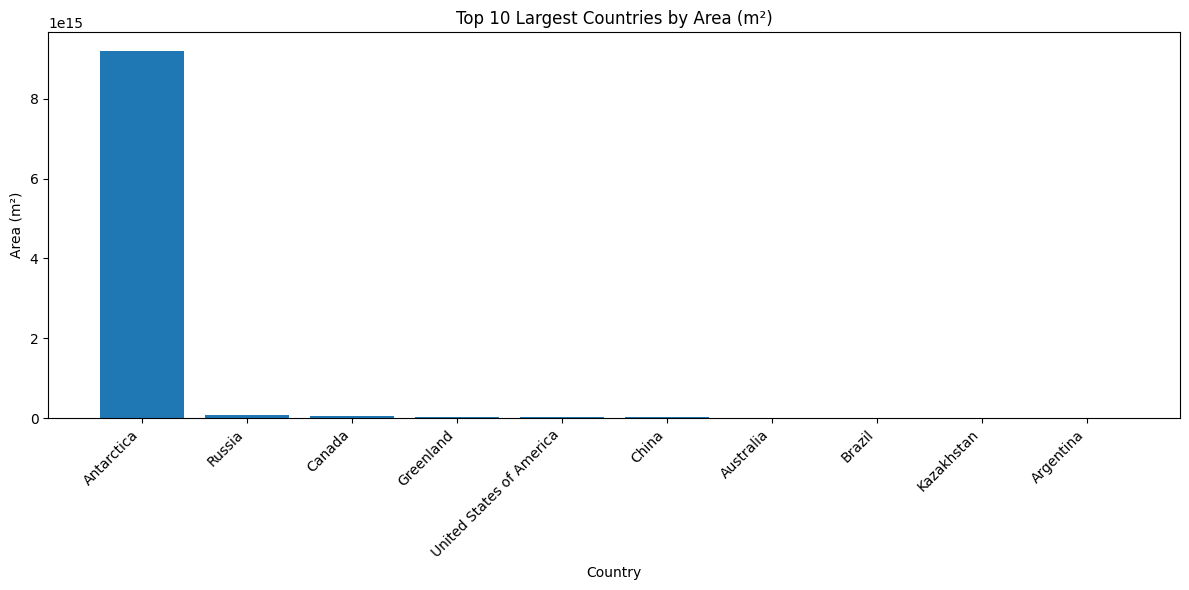

In [20]:
import matplotlib.pyplot as plt
import geopandas as gpd

# Assuming 'world' is already loaded from previous cells
# If not, ensure cell 's06xdzpK65aj' is executed first.

# Reproject to Metric CRS (required for 'world_projected' and 'area_m2')
url = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)
world_projected = world.to_crs(epsg=3857)
world_projected["area_m2"] = world_projected.geometry.area

# Sort and get top 10 largest countries by area
top10 = world_projected.sort_values("area_m2", ascending=False).head(10)

print(top10[["ADMIN", "area_m2"]])

# Plot bar chart
plt.figure(figsize=(12, 6))
plt.bar(top10["ADMIN"], top10["area_m2"])
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Largest Countries by Area (m²)")
plt.ylabel("Area (m²)")
plt.xlabel("Country")
plt.tight_layout()
plt.show()

#Reflection

During this lab, one difficulty I encountered was understanding why area calculations were incorrect before reprojection. I initially did not realize that geographic coordinates in degrees cannot produce accurate area measurements. I learned that choosing the correct CRS is critical in spatial analysis because it directly affects measurement accuracy. I also gained a better understanding of how spatial features like area and centroid coordinates can be used in machine learning applications.